Performing parametric tests¶

A parametric test is a statistical hypothesis test that relies on specific assumptions regarding the underlying distribution of the data under examination. These assumptions commonly involve characteristics of the distribution's shape, often presumed to adhere to a normal or Gaussian pattern, as well as the equality of variances across the groups being contrasted. While parametric tests are robust and effective when these assumptions hold true, they might yield unreliable outcomes when the assumptions are not satisfied.

Series of test will be run on this dataset to confirm if it's worthy of parametric test. The conditions include :

Normality Assumption: This will be done through methods like histogram plots, Q-Q plots, or formal statistical tests like the Shapiro-Wilk test.

Homogeneity of Variances: This assumption is also known as homoscedasticity. Tests like Levene's test or the Bartlett test can assess the homogeneity of variances.

Independence: Observations within each group should be independent of each other. This means that the value of one observation should not depend on the value of another observation.

Continuous Data: Parametric tests are suitable for continuous or numeric data. They are not typically used for categorical or ordinal data.

In [ ]:
!pip install matplotlib seaborn scipy statsmodels

In [295]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = f"data/2023CarDataset.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,Car Make,Car Model,Year,Body Type,Color Options,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Transmission Type,Acceleration (0-60 mph),Top Speed (mph),Mileage (MPG),Safety Features,Entertainment Features,Interior Features,Exterior Features,Price ($),Customer Ratings,Sales Figures (Units Sold)
0,Toyota,Camry,2022,Sedan,"White, Silver, Black",Gasoline,2.5,203,245,Automatic,7.9 seconds,135,31,"ABS, Airbags, Lane-Keeping Assist, Blind Spot...",8-inch Touchscreen Infotainment System,"Leather Seats, Power Driver's Seat, Dual-Zone...","LED Headlights, Alloy Wheels, Sunroof ...","28,500",4.5/5,"1,500"
1,Ford,F-150,2023,Truck,"Blue, Red, Gray",Gasoline,3.5,375,475,Automatic,6.1 seconds,145,23,"ABS, Airbags, Trailer Sway Control, Rear View...",12-inch SYNC 4 Infotainment System,"Cloth Seats, Power Windows, Keyless Entry ...","LED Taillights, Tow Hitch, Bed Liner ...","45,900",4.8/5,"2,200"
2,Honda,Civic,2023,Sedan,"Black, Blue, Silver",Gasoline,1.8,158,180,CVT,8.2 seconds,120,36,"ABS, Airbags, Lane Departure Warning, Rear Cr...",7-inch Display Audio System,"Cloth Seats, Bluetooth Connectivity, Push But...","LED Daytime Running Lights, Alloy Wheels ...","22,950",4.6/5,"2,800"
3,Chevrolet,Tahoe,2023,SUV,"Red, White, Gray",Gasoline,5.3,355,519,Automatic,7.1 seconds,130,19,"ABS, Airbags, Forward Collision Warning, Lane...",10.2-inch Infotainment System,"Leather Seats, Heated Front Seats, Third-Row ...","LED Headlights, Roof Rails, Power Liftgate ...","53,250",4.7/5,"1,000"
4,Tesla,Model 3,2023,Sedan,"Blue, Red, Silver",Electric,N/A,283 (est.),440 (est.),Automatic,5.2 seconds,140 (est.),125 (est.),"Enhanced Autopilot, Lane Departure Warning, A...",15.4-inch Infotainment Display,"Vegan Leather Seats, Heated Steering Wheel, P...","Panoramic Glass Roof, Power Trunk, Alloy Whee...","49,990",4.9/5,"4,500"


In [296]:
# Assuming df is your existing DataFrame
print(df.columns)

Index([' Car Make ', ' Car Model   ', ' Year ', ' Body Type ',
       ' Color Options                 ', ' Fuel Type ', ' Engine Size (L) ',
       ' Horsepower ', ' Torque (Nm) ', ' Transmission Type ',
       ' Acceleration (0-60 mph) ', ' Top Speed (mph) ', ' Mileage (MPG) ',
       ' Safety Features                                      ',
       ' Entertainment Features               ',
       ' Interior Features                                ',
       ' Exterior Features                                           ',
       ' Price ($) ', ' Customer Ratings ', ' Sales Figures (Units Sold) '],
      dtype='object')


In [297]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Now try selecting the columns again
new_df = df[['Year','Fuel Type','Engine Size (L)','Horsepower', 'Torque (Nm)','Top Speed (mph)', 'Mileage (MPG)','Price ($)']]

In [298]:
# Display the datatypes of columns
print(new_df.dtypes)

Year                int64
Fuel Type          object
Engine Size (L)    object
Horsepower         object
Torque (Nm)        object
Top Speed (mph)    object
Mileage (MPG)      object
Price ($)          object
dtype: object


In [299]:
# NuLL check says zero. but doesnt catch the Strings
new_df.isnull().sum()

Year               0
Fuel Type          0
Engine Size (L)    0
Horsepower         0
Torque (Nm)        0
Top Speed (mph)    0
Mileage (MPG)      0
Price ($)          0
dtype: int64

In [300]:
# NuLL check says zero. but doesnt catch the Strings "N/A"
new_df.isna().sum()

Year               0
Fuel Type          0
Engine Size (L)    0
Horsepower         0
Torque (Nm)        0
Top Speed (mph)    0
Mileage (MPG)      0
Price ($)          0
dtype: int64

In [301]:
df_filled = new_df

CONDITION 1 : Check normality assumption using Shapiro-Wilk test¶
The Shapiro-Wilk test is a formal statistical examination employed to evaluate whether a provided dataset adheres to a normal distribution. It furnishes a p-value that quantifies the probability of encountering the observed data if it were drawn from a normal distribution. The null hypothesis of this test asserts that the data follows a normal distribution.

Interpreting the normality of the data based on the p-value from the Shapiro-Wilk test involves the following criteria:

Small p-value (p ≤ α): If the p-value derived from the Shapiro-Wilk test is equal to or smaller than a selected significance level (α), often set at 0.05, it indicates grounds for dismissing the null hypothesis. This implies that the data significantly deviates from a normal distribution.

Large p-value (p > α): When the p-value surpasses the significance level (α), it implies there is insufficient evidence to discard the null hypothesis. In simpler terms, one cannot conclude that the data significantly diverges from a normal distribution.

In [302]:
df_filled.head(10)

,Year,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Top Speed (mph),Mileage (MPG),Price ($)
0,2022,Gasoline,2.5,203,245,135,31,"28,500"
1,2023,Gasoline,3.5,375,475,145,23,"45,900"
2,2023,Gasoline,1.8,158,180,120,36,"22,950"
3,2023,Gasoline,5.3,355,519,130,19,"53,250"
4,2023,Electric,N/A,283 (est.),440 (est.),140 (est.),125 (est.),"49,990"
5,2023,Gasoline,2.5,181,245,115,28,"27,850"
6,2022,Gasoline,3,335,450,155,24,"62,700"
7,2023,Gasoline,2.5,191,245,130,29,"28,450"
8,2023,Gasoline,5,450,570,180,19,"42,850"
9,2023,Gasoline,2.5,203,243,120,30,"29,350"


In [303]:
df_filled['Fuel Type'].unique()

array([' Gasoline  ', ' Electric  ', ' Hybrid    '], dtype=object)

In [304]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Fuel Type' column
df_filled['Fuel Type'] = label_encoder.fit_transform(df_filled['Fuel Type'])

df_filled.head()

/var/folders/n1/8tcg96l117b4ttn71xlm_lc80000gn/T/ipykernel_91744/4089897740.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['Fuel Type'] = label_encoder.fit_transform(df_filled['Fuel Type'])


,Year,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Top Speed (mph),Mileage (MPG),Price ($)
0,2022,1,2.5,203,245,135,31,"28,500"
1,2023,1,3.5,375,475,145,23,"45,900"
2,2023,1,1.8,158,180,120,36,"22,950"
3,2023,1,5.3,355,519,130,19,"53,250"
4,2023,0,N/A,283 (est.),440 (est.),140 (est.),125 (est.),"49,990"


In [305]:
# Remove spaces from all string columns in the DataFrame
df_filled = df_filled.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/var/folders/n1/8tcg96l117b4ttn71xlm_lc80000gn/T/ipykernel_91744/3973499521.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filled = df_filled.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [306]:
df_filled['Torque (Nm)'].unique()

array(['245', '475', '180', '519', '440 (est.)', '450', '570', '243',
       '350', '624', '240', '376', '881', '380', '251', '370', '353',
       '250', '239', '356', '420', '630', '650', '241', '355', '348',
       '351', '278', '379', '275', '172', '520', '237', '198', '267',
       '359', '500', '542', '360 (est.)', 'N/A', '349', '317', '263',
       '138', '277', '114', '148', '182', '310', '479', '262', '375',
       '281', '113', '311', '295', '139', '155', '186', '132', '470',
       '317 (est.)', '260', '273', '330', '181', '258', '151', '176',
       '280', '175', '190', '259'], dtype=object)

In [307]:
# Convert 'price' column to numeric
df_filled['Price ($)'] = df_filled['Price ($)'].str.replace(',', '').astype(float)

In [308]:
# Convert columns to numeric data types
numeric_columns = ['Engine Size (L)','Horsepower', 'Torque (Nm)','Top Speed (mph)', 'Mileage (MPG)','Price ($)']
df_filled[numeric_columns] = df_filled[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [309]:
df_filled.isna().sum()

Year                0
Fuel Type           0
Engine Size (L)     9
Horsepower         15
Torque (Nm)        15
Top Speed (mph)    15
Mileage (MPG)      15
Price ($)           0
dtype: int64

In [310]:
df_filled.dtypes

Year                 int64
Fuel Type            int64
Engine Size (L)    float64
Horsepower         float64
Torque (Nm)        float64
Top Speed (mph)    float64
Mileage (MPG)      float64
Price ($)          float64
dtype: object

In [311]:
df_filled.dropna(inplace=True)

In [312]:
# Check normality assumption using Shapiro-Wilk test
from scipy import stats

for column in df_filled.columns:
    _, p_value = stats.shapiro(df_filled[column])
    print(f'Shapiro-Wilk p-value for {column}: {p_value:.4f}')

Shapiro-Wilk p-value for Year: 0.0000
Shapiro-Wilk p-value for Fuel Type: 1.0000
Shapiro-Wilk p-value for Engine Size (L): 0.0000
Shapiro-Wilk p-value for Horsepower: 0.0000
Shapiro-Wilk p-value for Torque (Nm): 0.0000
Shapiro-Wilk p-value for Top Speed (mph): 0.0000
Shapiro-Wilk p-value for Mileage (MPG): 0.0002
Shapiro-Wilk p-value for Price ($): 0.0000


/Users/apple/learning/code/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


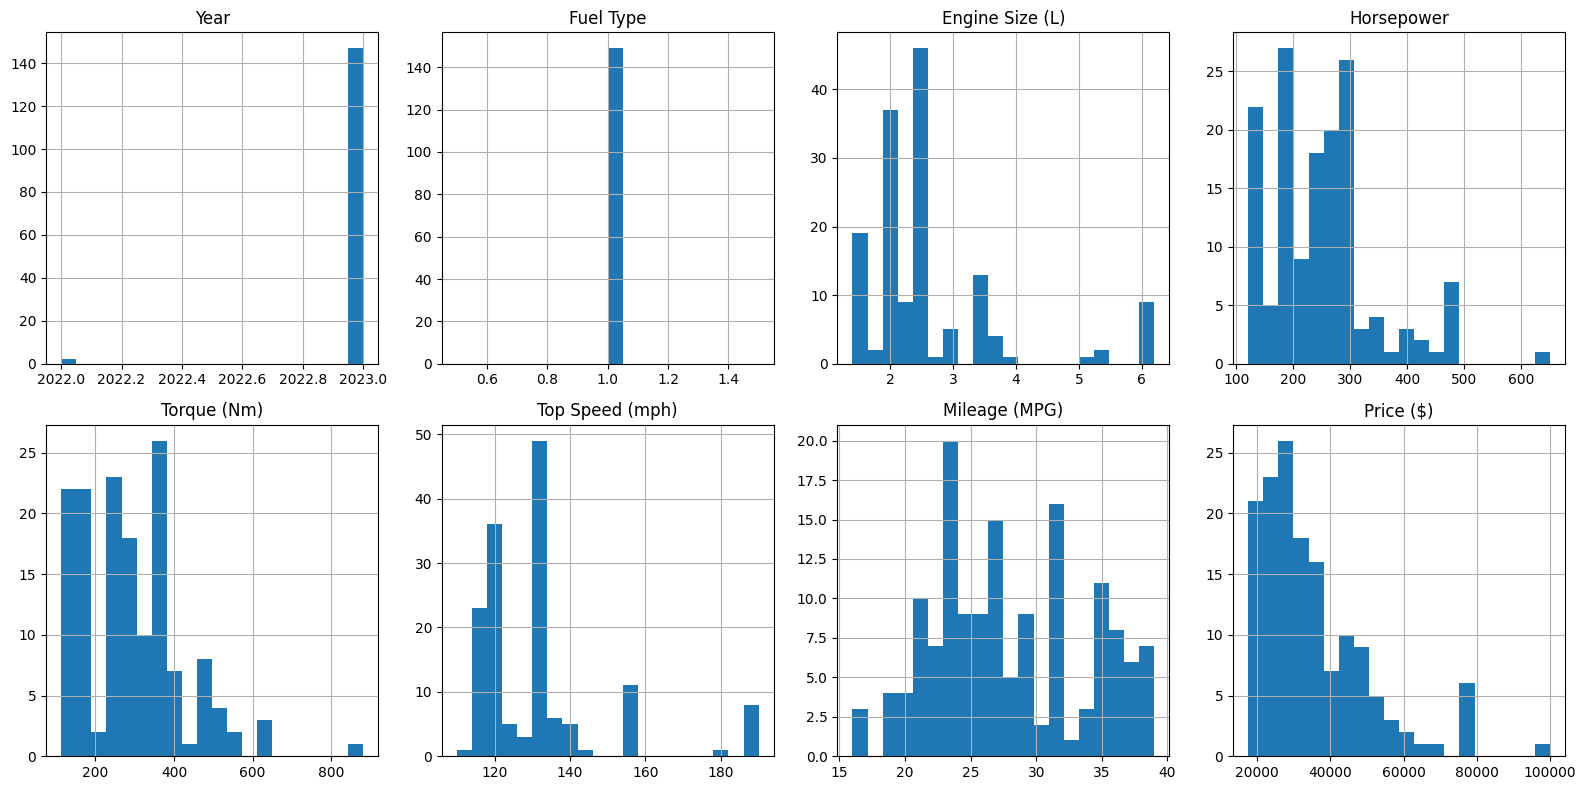

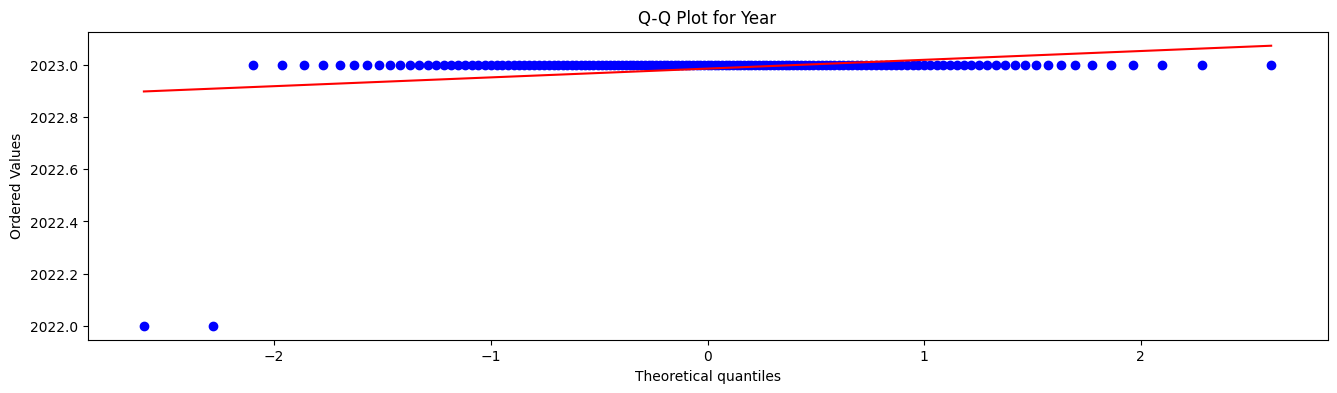

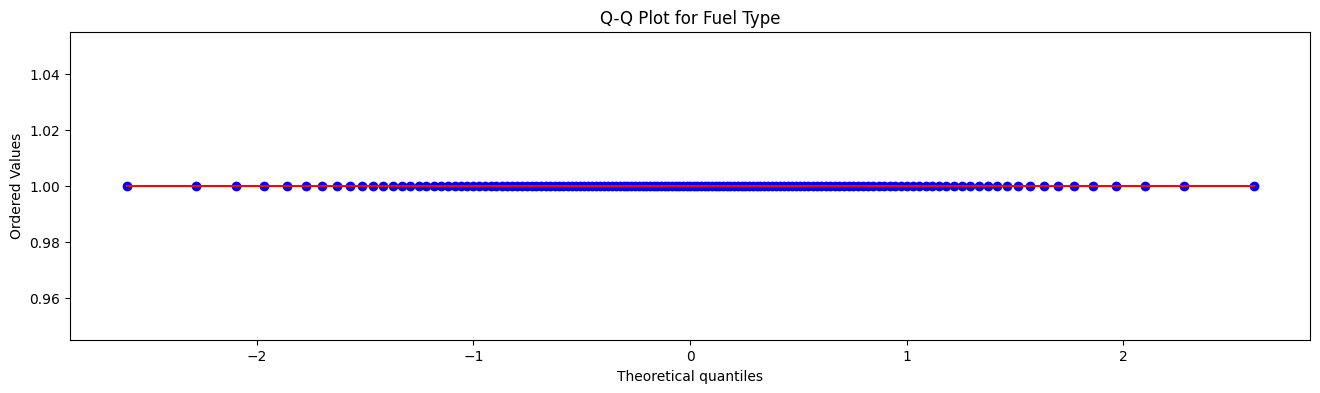

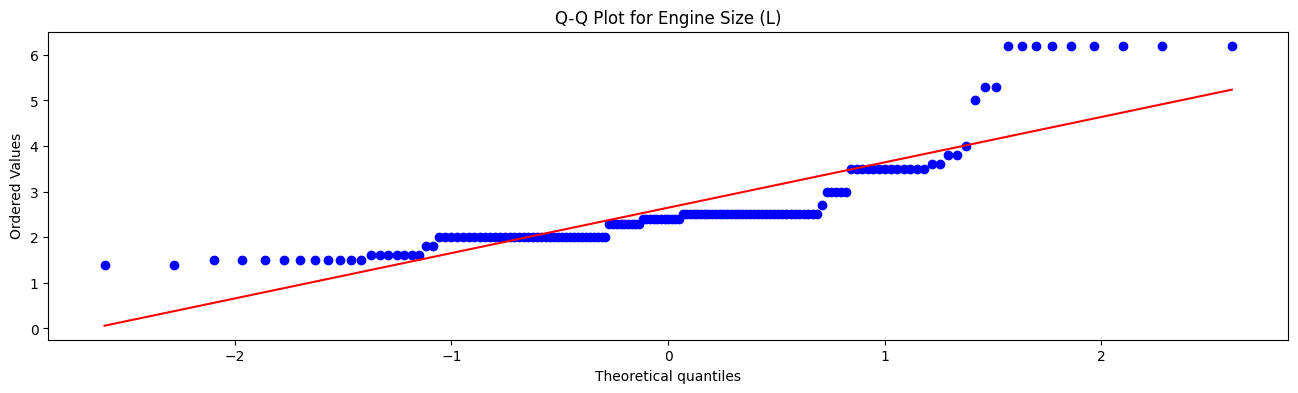

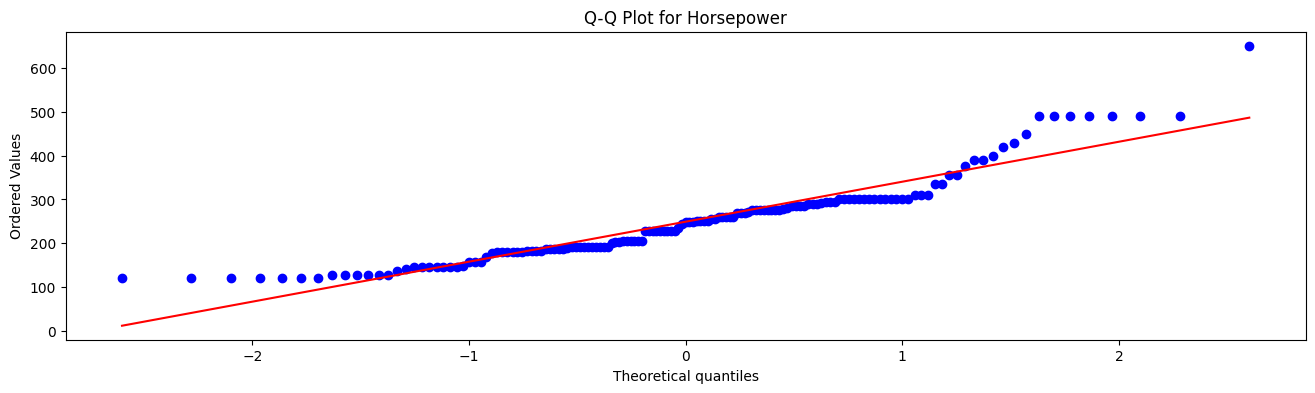

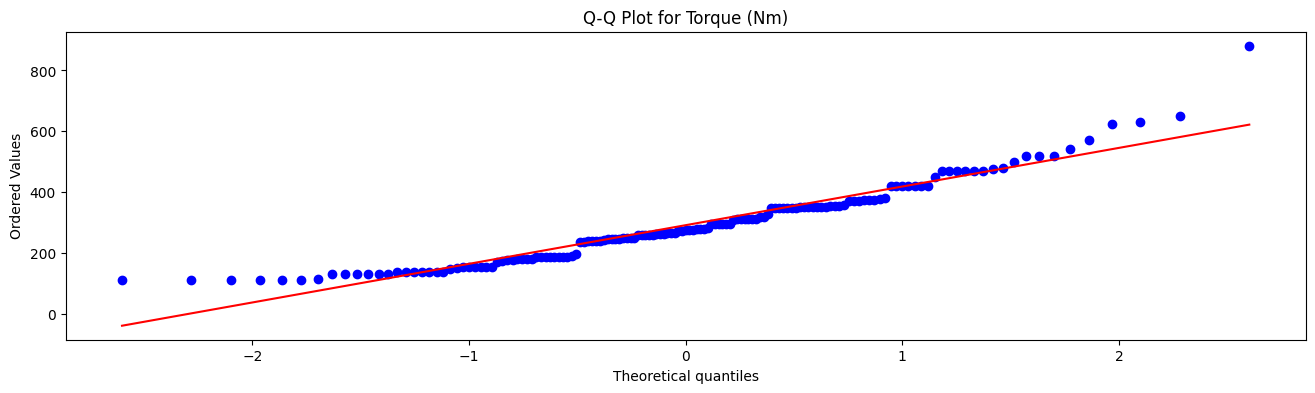

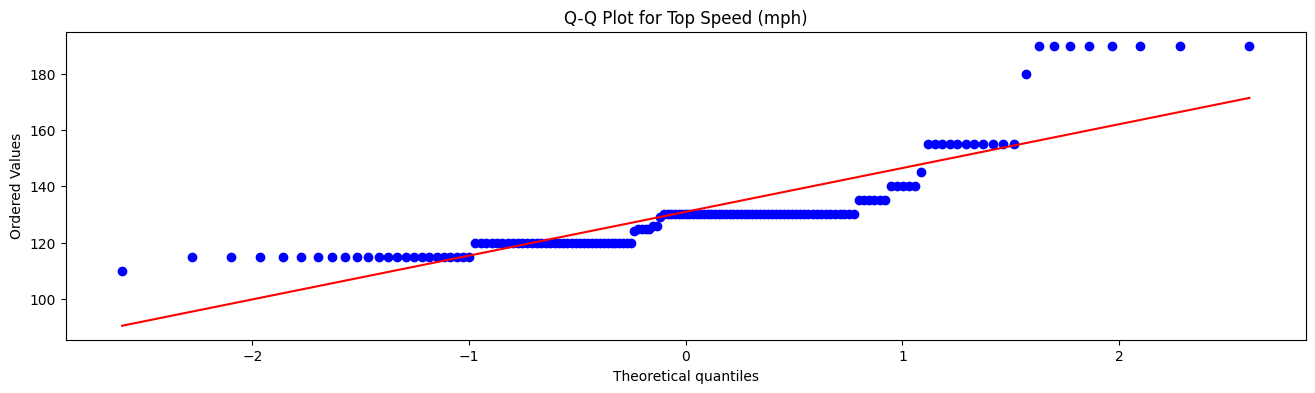

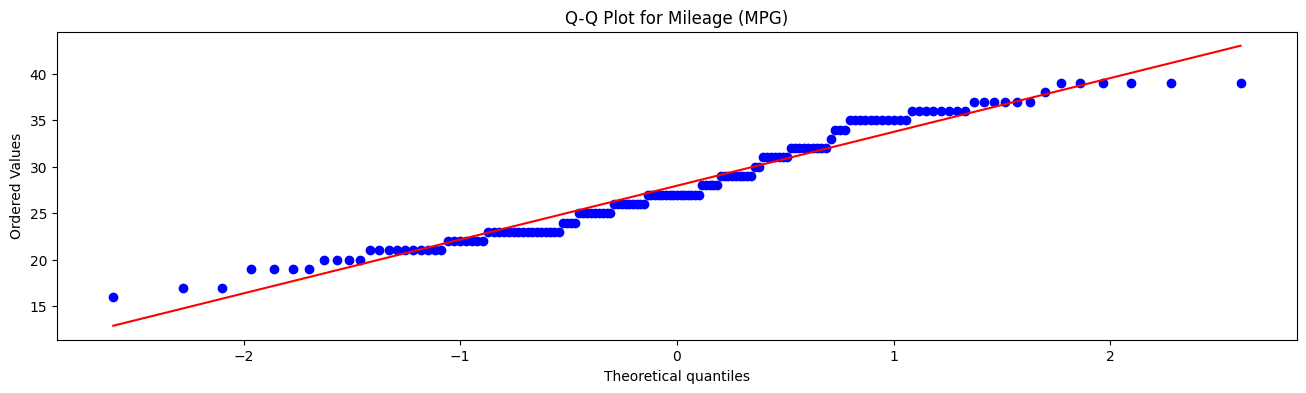

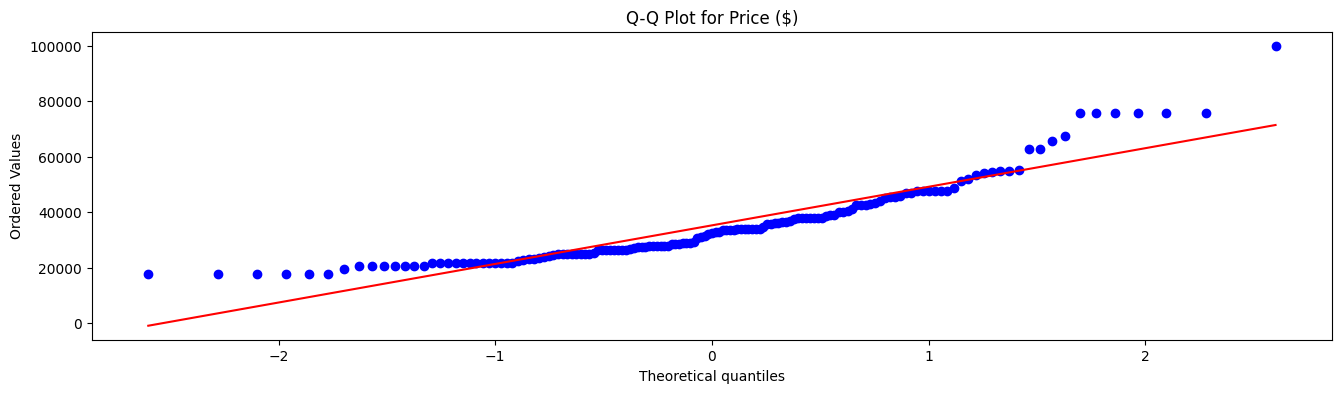

In [313]:
# Check normality assumption using histograms
import matplotlib.pyplot as plt
df_filled.hist(layout=(2, 4), bins=20, figsize=(16, 8))
plt.tight_layout()
plt.show()



# Check normality assumption using Q-Q plots
for column in df_filled.columns:
    plt.figure(figsize=(16, 4))
    stats.probplot(df_filled[column], plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


Shapiro-Wilk Test Vs. QQ Plot

The Shapiro-Wilk test and the QQ plot are both tools used to assess the normality of a dataset. However, they operate on different principles and may not always yield the same results. It's possible to encounter situations where the Shapiro-Wilk test suggests that a dataset follows a normal distribution, but the QQ plot indicates otherwise.

Here's what could be happening in such a scenario:

Shapiro-Wilk Test:
The Shapiro-Wilk test is a statistical test that formally tests the null hypothesis that a dataset follows a normal distribution. A low p-value from this test suggests that the null hypothesis can be rejected, indicating that the data significantly deviates from a normal distribution. However, if the p-value is high (greater than the chosen significance level, often 0.05), the test fails to reject the null hypothesis, suggesting that the data could be normally distributed.

QQ Plot:
A Q-Q (quantile-quantile) plot is a graphical tool used to visually assess the distribution of a dataset compared to a theoretical normal distribution. In a QQ plot, if the points closely follow a straight line, it indicates that the data is approximately normally distributed. If the points deviate from the straight line, it suggests deviations from normality.

Now, let's consider the scenario if Shapiro-Wilk test confirms that a dataset follows a normal distribution, but QQ plot fails to do so.

If the Shapiro-Wilk test suggests that the data follows a normal distribution (high p-value), it means that the data does not significantly deviate from normality according to the test's criteria.

However, if the QQ plot fails to show a straight line (i.e., the points deviate from the line), it could suggest that there are specific patterns in the data that are not well-captured by a normal distribution. These patterns might include heavy tails, skewness, or other departures from the symmetry and characteristics of a normal distribution.

In this situation, it's important to interpret these results together and consider the context of your analysis. It's possible that the Shapiro-Wilk test might be sensitive to certain departures from normality, while the QQ plot might be sensitive to different aspects. If there's a mismatch between the two, it might be an indication that the data has some complexities that aren't fully accounted for by a simple assessment of normality.

Ultimately, the decision to treat data as approximately normal should not rely solely on a single test or plot. It's recommended to use multiple methods, consider the characteristics of your data, and make informed decisions based on the goals of your analysis.

In [314]:
import pandas as pd
import numpy as np

# Calculate skewness for each column except 'Price ($)'
columns_to_check = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (Nm)', 'Top Speed (mph)', 'Mileage (MPG)']
skewness_values = df_filled[columns_to_check].skew()

# Display skewness values
print("Skewness Values:")
print(skewness_values)

# Define a threshold for skewness to identify potential outliers
skewness_threshold = 1.5

# Check for columns with skewness exceeding the threshold
columns_with_skewness = skewness_values[abs(skewness_values) > skewness_threshold].index

# Print columns with skewness exceeding the threshold
print("\nColumns with Skewness Exceeding Threshold:")
print(columns_with_skewness)

# Display summary statistics of potential outliers
print("\nSummary Statistics of Potential Outliers:")
print(df_filled[columns_with_skewness].describe())

Skewness Values:
Year              -8.542815
Engine Size (L)    1.977463
Horsepower         1.220533
Torque (Nm)        1.070706
Top Speed (mph)    2.064777
Mileage (MPG)      0.225683
dtype: float64

Columns with Skewness Exceeding Threshold:
Index(['Year', 'Engine Size (L)', 'Top Speed (mph)'], dtype='object')

Summary Statistics of Potential Outliers:
              Year  Engine Size (L)  Top Speed (mph)
count   149.000000       149.000000       149.000000
mean   2022.986577         2.648322       130.939597
std       0.115465         1.141928        18.058175
min    2022.000000         1.400000       110.000000
25%    2023.000000         2.000000       120.000000
50%    2023.000000         2.400000       130.000000
75%    2023.000000         2.500000       130.000000
max    2023.000000         6.200000       190.000000


In [315]:
df_filled.dtypes

Year                 int64
Fuel Type            int64
Engine Size (L)    float64
Horsepower         float64
Torque (Nm)        float64
Top Speed (mph)    float64
Mileage (MPG)      float64
Price ($)          float64
dtype: object

To address the skewness in the specified columns and ensure that they no longer exceed the threshold, you can apply a transformation to these columns to make the distribution more symmetric. One commonly used transformation is the logarithmic transformation.

Here's how to do it:

In [316]:
import pandas as pd
import numpy as np

# Columns with skewness exceeding the threshold
columns_to_transform = ['Engine Size (L)', 'Top Speed (mph)']

# Apply a logarithmic transformation to the specified columns
df_filled[columns_to_transform] = np.log1p(df_filled[columns_to_transform])

# Recalculate skewness after transformation
skewness_values_after = df_filled[columns_to_transform].skew()

# Display skewness values after transformation
print("Skewness Values After Transformation:")
print(skewness_values_after)

Skewness Values After Transformation:
Engine Size (L)    1.292475
Top Speed (mph)    1.727863
dtype: float64


linkcode
In this code:

I specify the columns that have skewness exceeding the threshold (columns_to_transform).

I apply a logarithmic transformation to the specified columns using the np.log1p() function. The log1p function calculates the natural logarithm of the values plus 1, which is useful for handling zero and negative values.

I recalculate the skewness values after the transformation using the skew() function.

I print the skewness values after the transformation to verify that the skewness is reduced.

Keep in mind that this transformation may help reduce skewness, but it might not completely eliminate it. You can explore other transformation methods or consider other data preprocessing techniques based on the characteristics of your data and the requirements of your analysis.

In [317]:
import pandas as pd
import numpy as np

# Calculate skewness for each column except 'Price ($)'
columns_to_check = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (Nm)', 'Top Speed (mph)', 'Mileage (MPG)']
skewness_values = df_filled[columns_to_check].skew()

# Display skewness values
print("Skewness Values:")
print(skewness_values)

# Define a threshold for skewness to identify potential outliers
skewness_threshold = 1.5

# Check for columns with skewness exceeding the threshold
columns_with_skewness = skewness_values[abs(skewness_values) > skewness_threshold].index

# Print columns with skewness exceeding the threshold
print("\nColumns with Skewness Exceeding Threshold after logarithm function:")
print(columns_with_skewness)

# Display summary statistics of potential outliers
print("\nSummary Statistics of Potential Outliers after logarithm function:")
print(df_filled[columns_with_skewness].describe())

Skewness Values:
Year              -8.542815
Engine Size (L)    1.292475
Horsepower         1.220533
Torque (Nm)        1.070706
Top Speed (mph)    1.727863
Mileage (MPG)      0.225683
dtype: float64

Columns with Skewness Exceeding Threshold after logarithm function:
Index(['Year', 'Top Speed (mph)'], dtype='object')

Summary Statistics of Potential Outliers after logarithm function:
              Year  Top Speed (mph)
count   149.000000       149.000000
mean   2022.986577         4.874316
std       0.115465         0.122736
min    2022.000000         4.709530
25%    2023.000000         4.795791
50%    2023.000000         4.875197
75%    2023.000000         4.875197
max    2023.000000         5.252273


In this case, I can eliminate the top speed column and work with remaining columns.

In [319]:
# Drop the specified columns from the DataFrame
columns_to_drop = ['Top Speed (mph)', 'Price ($)']

df_cleaned = df_filled.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
df_cleaned

,Year,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Mileage (MPG)
0,2022,1,1.252763,203.0,245.0,31.0
1,2023,1,1.504077,375.0,475.0,23.0
2,2023,1,1.029619,158.0,180.0,36.0
3,2023,1,1.840550,355.0,519.0,19.0
5,2023,1,1.252763,181.0,245.0,28.0
...,...,...,...,...,...,...
159,2023,1,1.504077,284.0,259.0,26.0
160,2023,1,1.098612,250.0,258.0,26.0
161,2023,1,1.223775,182.0,176.0,35.0
162,2023,1,1.504077,290.0,267.0,27.0


In [320]:
# Drop rows with NaN values from the cleaned DataFrame
df_cleaned_no_nan = df_cleaned.dropna()

# Display the DataFrame without NaN values
df_cleaned_no_nan

,Year,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Mileage (MPG)
0,2022,1,1.252763,203.0,245.0,31.0
1,2023,1,1.504077,375.0,475.0,23.0
2,2023,1,1.029619,158.0,180.0,36.0
3,2023,1,1.840550,355.0,519.0,19.0
5,2023,1,1.252763,181.0,245.0,28.0
...,...,...,...,...,...,...
159,2023,1,1.504077,284.0,259.0,26.0
160,2023,1,1.098612,250.0,258.0,26.0
161,2023,1,1.223775,182.0,176.0,35.0
162,2023,1,1.504077,290.0,267.0,27.0


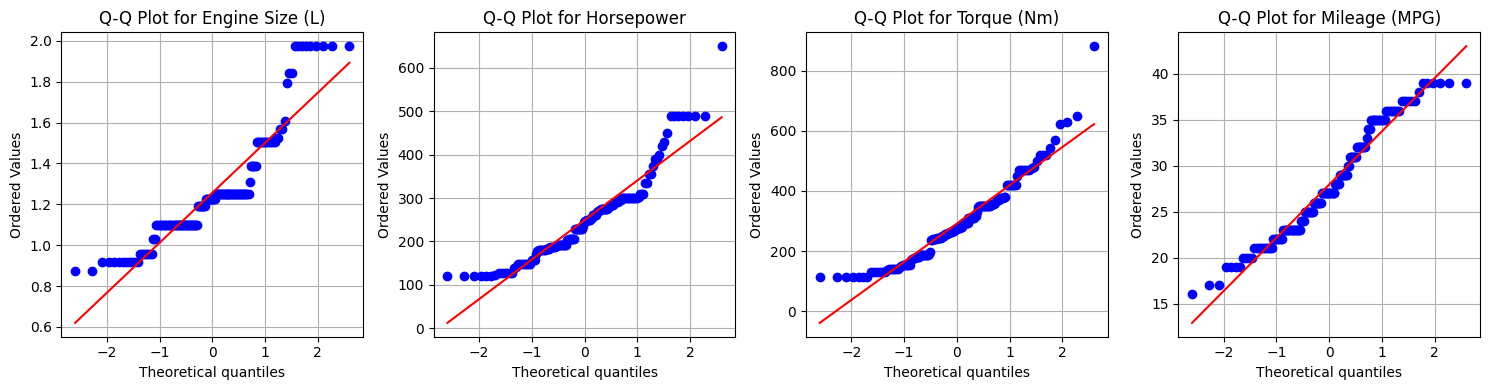

In [321]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Columns to check for normality
columns_to_check = ['Engine Size (L)', 'Horsepower', 'Torque (Nm)', 'Mileage (MPG)']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_check), figsize=(15, 4))

# Generate Q-Q plots for each column
for i, column in enumerate(columns_to_check):
    stats.probplot(df_cleaned_no_nan[column], plot=axes[i], dist="norm")
    axes[i].set_title(f'Q-Q Plot for {column}')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Intepretation of Q-Q plots for normality test¶
The rules of Q-Q plots for normality test states that :

"if the points closely follow a straight line, one would suggest that the data is approximately normally distributed."

In this case, 3 variables met the conditions, which are Horsepower, Torque and Mileage. Thus, one assert that they are great for parametric tests.

CONDITION 2 - The assumption of homogeneity of variances.

Put simply, homogeneity of variances implies that the extent or scattering of data points is approximately uniform among all compared groups. When this condition is satisfied, it signifies that the fluctuation in data is uniform across groups, bolstering the reliability and precision of statistical analyses.

When the p-value exceeds a chosen significance threshold (e.g., 0.05), there is no substantiation to discard the null hypothesis of equal variances. This indicates adherence to homogeneity of variances.

Conversely, if the p-value falls below the significance level, there is substantiated reason to reject the null hypothesis. This implies dissimilarity in variances, hinting at a possible breach of the homogeneity of variances assumption.

In [323]:
import scipy.stats as stats

# Columns to check for homogeneity of variances
columns_to_check = ['Horsepower', 'Torque (Nm)', 'Mileage (MPG)']

# Remove rows with missing values
df_cleaned_no_nan = df_cleaned_no_nan.dropna(subset=columns_to_check)

# Perform Levene's test for homogeneity of variances
levene_pvalue = stats.levene(
    df_cleaned_no_nan['Horsepower'],
    df_cleaned_no_nan['Torque (Nm)'],
    df_cleaned_no_nan['Mileage (MPG)']
).pvalue

# Perform Bartlett's test for homogeneity of variances
bartlett_pvalue = stats.bartlett(
    df_cleaned_no_nan['Horsepower'],
    df_cleaned_no_nan['Torque (Nm)'],
    df_cleaned_no_nan['Mileage (MPG)']
).pvalue

print(f"Levene's p-value: {levene_pvalue:.4f}")
print(f"Bartlett's p-value: {bartlett_pvalue:.4f}")

Levene's p-value: 0.0000
Bartlett's p-value: 0.0000


In [324]:
df_cleaned_no_nan

,Year,Fuel Type,Engine Size (L),Horsepower,Torque (Nm),Mileage (MPG)
0,2022,1,1.252763,203.0,245.0,31.0
1,2023,1,1.504077,375.0,475.0,23.0
2,2023,1,1.029619,158.0,180.0,36.0
3,2023,1,1.840550,355.0,519.0,19.0
5,2023,1,1.252763,181.0,245.0,28.0
...,...,...,...,...,...,...
159,2023,1,1.504077,284.0,259.0,26.0
160,2023,1,1.098612,250.0,258.0,26.0
161,2023,1,1.223775,182.0,176.0,35.0
162,2023,1,1.504077,290.0,267.0,27.0


## Test of Normality vs assumption of homogeneity of variances

If Levene's test and Bartlett's test both indicate that the variances are significantly different (i.e., p-values are close to or equal to 0.0000), but the conditions of normality (such as confirmed through Shapiro-Wilk test or Q-Q plots) are met, it can indicate a situation where the assumption of homogeneity of variances is violated, but the assumption of normality is not. This situation is not uncommon in real-world data analysis.

In this case, you might need to consider using statistical tests or techniques that are robust to violations of homogeneity of variances. Some options include:

Welch's t-test: This is a modification of the t-test that can be used when variances are unequal between groups. It's more robust in the presence of unequal variances.

Non-parametric tests: If your data violates the assumptions of both normality and homogeneity of variances, you can consider using non-parametric tests like the Mann-Whitney U test (for two groups) or the Kruskal-Wallis test (for multiple groups). These tests do not assume normality or equal variances.

Transformations: In some cases, transforming the data (e.g., taking the logarithm) can help stabilize the variances and make the data more normally distributed. However, this approach should be used cautiously and interpreted appropriately.

Bootstrapping: Bootstrapping is a resampling technique that can be used to generate a distribution of sample statistics. It can provide robust estimates of confidence intervals and p-values, even in the presence of violations of assumptions.

Robust regression: If your analysis involves regression, you can consider using robust regression techniques that are less sensitive to outliers and violations of assumptions.

Remember that the choice of method depends on the specific context of your analysis, the goals of your study, and the characteristics of your data. It's important to interpret the results of any statistical analysis in the broader context of your research question and domain knowledge.

## VERDICT

One may still proceed for parametric statistics since condition of normality is met. Although the may be issues of calculation while working with multiple regression.

In [325]:
# Define the columns to test
columns_to_test = ['Horsepower', 'Torque (Nm)', 'Mileage (MPG)']

# Calculate the correlation matrix
correlation_matrix = df_cleaned_no_nan[columns_to_test].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Horsepower  Torque (Nm)  Mileage (MPG)
Horsepower       1.000000     0.880702      -0.730934
Torque (Nm)      0.880702     1.000000      -0.769643
Mileage (MPG)   -0.730934    -0.769643       1.000000


### Horsepower and Mileage (MPG) Correlation¶

The correlation coefficient between 'Horsepower' and 'Mileage (MPG)' is -0.730934. This negative correlation suggests that as 'Horsepower' increases, 'Mileage (MPG)' tends to decrease. In other words, vehicles with higher horsepower are likely to have lower fuel efficiency (higher fuel consumption) and, consequently, lower mileage.

### Torque (Nm) and Mileage (MPG) Correlation

The correlation coefficient between 'Torque (Nm)' and 'Mileage (MPG)' is -0.769643. Similar to the correlation between 'Horsepower' and 'Mileage (MPG)', this negative correlation indicates that as 'Torque (Nm)' increases, 'Mileage (MPG)' tends to decrease.

However, it's important to note that correlation does not imply causation. In a regression analysis, we are aiming to quantify the impact of

independent variables (such as 'Horsepower' and 'Torque (Nm)') on the dependent variable ('Mileage (MPG)'), while accounting

for potential confounding factors and other statistical considerations.



### Linear Regression
Linear regression is a statistical method used to model the relationship between one or more independent variables (also called predictor variables) and a dependent variable (the target variable). It assumes a linear relationship between the independent variables and the dependent variable, aiming to find the best-fitting linear equation that predicts the values of the dependent variable based on the values of the independent variables.

In [328]:
import statsmodels.api as sm

# Define the columns for regression
dependent_variable = 'Mileage (MPG)'
independent_variables = ['Horsepower']

# Extract the data for the regression
X = df_cleaned_no_nan[independent_variables]
y = df_cleaned_no_nan[dependent_variable]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Mileage (MPG)   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.63e-26
Time:                        20:54:43   Log-Likelihood:                -416.58
No. Observations:                 149   AIC:                             837.2
Df Residuals:                     147   BIC:                             843.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1598      0.922     42.457      0.0

Overall, the results suggest that 'Horsepower' is a statistically significant predictor of 'Mileage (MPG)' in this regression model. As 'Horsepower' increases, 'Mileage (MPG)' tends to decrease, which is consistent with the negative correlation between these two variables observed in the correlation matrix.

When the p-value associated with a coefficient is less than a chosen significance level (commonly set at 0.05), it suggests that there is enough evidence to reject the null hypothesis that the coefficient is zero. In the context of linear regression:

Null Hypothesis (H0): The coefficient for the independent variable is equal to zero (i.e., the independent variable has no effect on the dependent variable).

Alternative Hypothesis (H1): The coefficient for the independent variable is not equal to zero (i.e., the independent variable does have an effect on the dependent variable).

In this case, since the p-value for 'Horsepower' is less than 0.05, there is sufficient evidence to reject the null hypothesis. This implies that there is a statistically significant relationship between 'Horsepower' and 'Mileage (MPG)'. In other words, changes in 'Horsepower' are associated with changes in 'Mileage (MPG)', and the relationship is not due to random chance.

In practical terms, one can interpret this as follows:

"For every one-unit increase in 'Horsepower', the predicted 'Mileage (MPG)' is expected to decrease by approximately 0.0449

units, holding other variables constant. The negative sign of the coefficient indicates that as 'Horsepower' increases, fuel efficiency

(measured by 'Mileage (MPG)') tends to decrease, which aligns with our intuitive understanding that more powerful engines typically consume more fuel."

In [329]:
import statsmodels.api as sm

# Define the columns for regression
dependent_variable = 'Mileage (MPG)'
independent_variables = ['Torque (Nm)']

# Extract the data for the regression
X = df_cleaned_no_nan[independent_variables]
y = df_cleaned_no_nan[dependent_variable]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Mileage (MPG)   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     213.6
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           1.93e-30
Time:                        20:56:09   Log-Likelihood:                -406.66
No. Observations:                 149   AIC:                             817.3
Df Residuals:                     147   BIC:                             823.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9958      0.752     50.547      

linkcode
IMPLICATION OF RESULT

The implication of the linear regression analysis is that there is a meaningful and statistically significant relationship between the variables 'Mileage (MPG)' and 'Torque (Nm)'. The negative coefficient for 'Torque (Nm)' suggests a specific impact on the 'Mileage (MPG)' variable:

Statistical Significance: The fact that the coefficient for 'Torque (Nm)' has a p-value close to zero indicates that it is statistically significant. This means that the observed relationship between 'Torque (Nm)' and 'Mileage (MPG)' is unlikely to have occurred by chance alone.

Direction of the Relationship: The negative sign of the coefficient for 'Torque (Nm)' indicates a negative relationship between the two variables. In other words, as 'Torque (Nm)' increases, 'Mileage (MPG)' tends to decrease.

Interpretation: Higher torque values, which are often associated with increased engine power and performance, seem to be connected to lower mileage values (fewer miles covered per gallon of fuel). This suggests that vehicles with higher torque might consume more fuel to produce the same level of mileage, potentially due to their increased power output.

Practical Implications: From a practical standpoint, this implies that when considering the trade-off between engine torque and fuel efficiency, higher torque may come at the cost of reduced mileage. This information can be valuable for both vehicle manufacturers and consumers who are making decisions about engine specifications and fuel efficiency.

Further Analysis: While the negative coefficient provides valuable insights, it's important to consider other factors that might contribute to the relationship between 'Torque (Nm)' and 'Mileage (MPG)'. Other variables such as vehicle weight, aerodynamics, transmission type, and driving conditions could also play a role in this relationship.

## Multiple regression

Multiple regression is a statistical technique used to analyze the relationship between a dependent variable (also called the outcome or response variable) and two or more independent variables (also called predictor or explanatory variables). It extends the concept of simple linear regression, which deals with only one independent variable, to situations where there are multiple predictors.

In multiple regression, the goal is to understand how changes in the independent variables are associated with changes in the dependent variable. It allows you to assess the relative contributions of each independent variable while controlling for the effects of other variables. This is particularly useful when you want to examine the influence of several factors on a single outcome.

In the case of this project, there was need to understand the influence of 'Horsepower', 'Torque (Nm)' on 'Mileage (MPG)'

In [330]:
import statsmodels.api as sm

# Define the independent variable (X) and dependent variables (y)
X = df_cleaned_no_nan[['Horsepower', 'Torque (Nm)']]
y = df_cleaned_no_nan['Mileage (MPG)']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Mileage (MPG)   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     111.8
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           3.61e-30
Time:                        20:56:58   Log-Likelihood:                -404.33
No. Observations:                 149   AIC:                             814.7
Df Residuals:                     146   BIC:                             823.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          38.9044      0.854     45.563      

Here, one may need to consider techniques such as:

Dropping one of the correlated variables if it makes theoretical sense.

Applying dimensionality reduction techniques like Principal Component Analysis (PCA).

Using regularization techniques like Ridge or Lasso regression.

### Difference between correlation and regression

Correlation and regression are both statistical techniques used to analyze relationships between variables, but they serve different purposes and provide distinct types of insights:

Correlation:

Correlation measures the strength and direction of a linear relationship between two variables. It indicates how changes in one variable are associated with changes in another variable.

Correlation coefficients range from -1 to +1. A positive correlation coefficient indicates a positive linear relationship, while a negative correlation coefficient indicates a negative linear relationship. A coefficient of 0 indicates no linear correlation.

Correlation does not imply causation. Even if two variables are strongly correlated, it does not necessarily mean that changes in one variable cause changes in the other. Correlation is symmetrical; the correlation coefficient between variables A and B is the same as the coefficient between B and A.

Regression:

Regression is used to model the relationship between a dependent variable and one or more independent variables. It estimates the equation of a straight line (or curve) that best fits the data.

Regression provides information about the nature and strength of the relationship between variables, and it can be used to make predictions and infer causal relationships.

In simple linear regression, there is one independent variable, and the goal is to find the best-fitting line that minimizes the distance between the observed data points and the predicted values on the line.

In multiple regression, there are two or more independent variables, and the goal is to find the best-fitting plane (or hyperplane) that represents the relationship between the variables.

Regression analysis can be used for prediction, understanding the effect of variables on each other, and identifying significant predictors.

Key Differences:

Purpose: Correlation assesses the degree and direction of linear association between two variables. Regression aims to model and quantify the relationship between a dependent variable and one or more independent variables.

Output: Correlation produces a correlation coefficient that ranges from -1 to +1. Regression produces an equation of a line or curve that represents the relationship between variables.

Causation: Correlation does not imply causation. Regression can provide insights into potential cause-and-effect relationships.

Number of Variables: Correlation involves only two variables. Regression can involve one or more independent variables.

Usage: Correlation is often used to describe the strength and direction of a relationship or to identify potentially related variables. Regression is used for prediction, modeling, and hypothesis testing.

Interpretation: Correlation focuses on the degree of linear association. Regression focuses on the equation that best represents the relationship between variables.

In summary, correlation helps us understand how two variables move together, while regression helps us model and predict one variable based on another. Both techniques are valuable tools in statistics and data analysis.